In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/umang datasets/depression.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,How often do you feel fatigued even after a full night's sleep?,Do you find yourself dwelling on negative thoughts for long periods?,How frequently do you struggle to find joy in activities you once enjoyed?,"When faced with a challenging task, how often do you feel helpless?",How often do you withdraw from friends and family when feeling low?,Do you notice an increase in your appetite or a significant decrease?,"How often do you have difficulty making decisions, even simple ones?","When you encounter stress, how often do you feel a sense of dread?",How frequently do you express your feelings to someone you trust?,Do you often feel a lack of motivation to get things done?,Final Score
0,2,2,3,3,1,1,2,2,2,4,45.609756
1,4,4,4,4,3,1,1,1,4,1,58.344948
2,4,3,2,4,2,4,4,4,4,3,69.006969
3,1,1,4,4,3,3,4,4,4,3,68.414634
4,4,4,4,4,3,3,3,4,3,4,73.449477


In [ ]:
df.describe()

,How often do you feel fatigued even after a full night's sleep?,Do you find yourself dwelling on negative thoughts for long periods?,How frequently do you struggle to find joy in activities you once enjoyed?,"When faced with a challenging task, how often do you feel helpless?",How often do you withdraw from friends and family when feeling low?,Do you notice an increase in your appetite or a significant decrease?,"How often do you have difficulty making decisions, even simple ones?","When you encounter stress, how often do you feel a sense of dread?",How frequently do you express your feelings to someone you trust?,Do you often feel a lack of motivation to get things done?,Final Score
count,4000.000000,4000.000000,4000.00000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.420250,2.444500,2.43150,2.42975,2.427250,2.421000,2.439750,2.435250,2.469500,2.469500,55.794948
std,1.298677,1.291835,1.30642,1.28646,1.270083,1.284201,1.299728,1.289272,1.264306,1.271996,12.360565
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.473868
25%,1.000000,1.000000,1.00000,1.75000,1.750000,1.000000,1.000000,1.000000,2.000000,2.000000,47.090592
50%,3.000000,3.000000,3.00000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,55.975610
75%,4.000000,4.000000,4.00000,4.00000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,64.564460
max,4.000000,4.000000,4.00000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,85.000000


In [ ]:
col_name = 0
for col in df.columns:
    df.rename(columns={col: str(col_name)}, inplace=True)
    col_name += 1


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2,2,3,3,1,1,2,2,2,4,45.609756
1,4,4,4,4,3,1,1,1,4,1,58.344948
2,4,3,2,4,2,4,4,4,4,3,69.006969
3,1,1,4,4,3,3,4,4,4,3,68.414634
4,4,4,4,4,3,3,3,4,3,4,73.449477


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = df.drop('10', axis=1)
y = df['10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')


MAE: 4.165503499011392, MSE: 25.137609066889684, R²: 0.8365089335669121


In [ ]:
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,52.125436,50.235889
1,52.717770,50.949652
2,58.937282,59.390418
3,62.491289,55.655749
4,62.195122,66.536934
5,55.679443,53.552962
6,64.860627,62.352091
7,50.052265,50.354355
8,48.275261,51.695993
9,67.229965,65.002787


<Figure size 2400x1200 with 0 Axes>

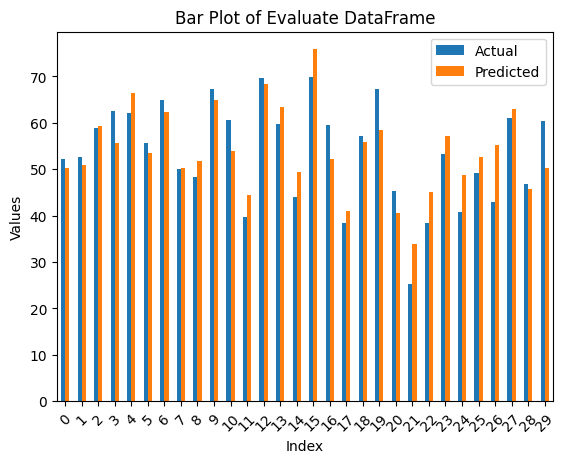

In [ ]:
plt.figure(figsize=(24, 12))
evaluate.head(30).plot(kind='bar')
plt.title('Bar Plot of Evaluate DataFrame')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Fitting the training data to our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#score of this model
regressor.score(X_test, y_test)


0.8870390283298741

In [ ]:
# predict the y values
y_pred_lin_reg=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate_lin_reg = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred_lin_reg.flatten()})
evaluate_lin_reg.head(10)

,Actual,Predicted
0,52.125436,46.086791
1,52.717770,52.554075
2,58.937282,58.793765
3,62.491289,56.616879
4,62.195122,65.158750
5,55.679443,55.275443
6,64.860627,61.900767
7,50.052265,47.281288
8,48.275261,54.336516
9,67.229965,66.923494


<Figure size 2400x1200 with 0 Axes>

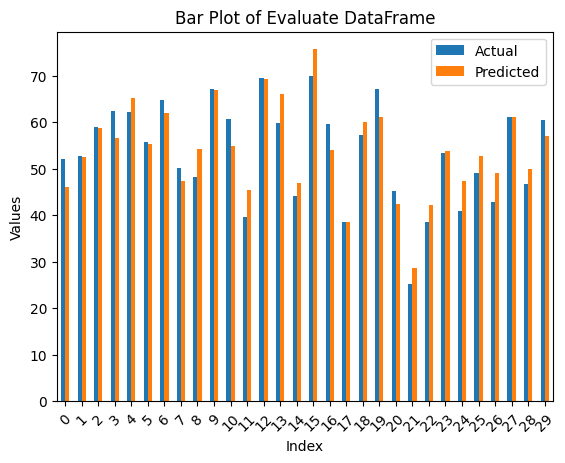

In [ ]:
plt.figure(figsize=(24, 12))
evaluate_lin_reg.head(30).plot(kind='bar')
plt.title('Bar Plot of Evaluate DataFrame')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pickle
with open(f'lin_reg_depression_model.pkl', 'wb') as file:
        pickle.dump(regressor, file)

In [ ]:
with open('lin_reg_depression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(np.array([[1,1,2,4,1,2,0,0,1,2]]))
print("Predictions:", predictions)

Predictions: [37.84397942]
